In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

import os
from nltk.corpus import stopwords
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from nltk.probability import FreqDist
from collections import Counter
import re
import string
from nltk.tokenize import word_tokenize
import datetime as dt
import gender_guesser.detector as gender
import time

# Import

In [5]:
df_connection = pd.read_csv('Connections2.csv',sep=',',encoding='utf-8')
df_contact = pd.read_csv('Contacts.csv',sep=',',encoding='utf-8')
df_message = pd.read_csv('messages.csv',sep=',',encoding='utf-8')
#latin1

df_connection.drop(columns = ['Email Address'],inplace=True)

In [6]:
df_connection.head()

,First Name,Last Name,Company,Position,Connected On
0,Claire,Lefresne,Le Groupe La Poste,Head of Data Lab and Innovation,15 Dec 2021
1,Anis,Amrane,CANAL+ Group,Concept artist,15 Dec 2021
2,Ghassen,Ben Hmidene,Société Générale,Data Science Manager,14 Dec 2021
3,Yuliet,Perea Diaz 💡,EFREI Paris,Chargée de mission carrière,13 Dec 2021
4,Lisa,KINTRUP,Slide Session,Vice-présidente,13 Dec 2021


In [4]:
df_contact.head()

,Source,FirstName,LastName,Companies,Title,Emails,PhoneNumbers,CreatedAt,Addresses,Sites,InstantMessageHandles,FullName,Birthday,Location,BookmarkedAt,Profiles
0,MOBILE_CONTACTS,Sony,Volley,NaN,NaN,NaN,06 60 50 79 71,"2/5/18, 1:54 AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MOBILE_CONTACTS,Vicktor,Syrot,NaN,NaN,NaN,06 98 59 41 77,"2/5/18, 1:54 AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MOBILE_CONTACTS,Alienor,Strich,NaN,NaN,NaN,+33 6 67 08 87 28,"2/5/18, 1:54 AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MOBILE_CONTACTS,Elise,Staint-up,NaN,NaN,NaN,06 59 96 19 01,"2/5/18, 1:54 AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MOBILE_CONTACTS,Simon,Seban,NaN,NaN,NaN,+33 6 42 09 48 30,"2/5/18, 1:54 AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_message.head()

,CONVERSATION ID,CONVERSATION TITLE,FROM,SENDER PROFILE URL,TO,DATE,SUBJECT,CONTENT,FOLDER
0,2-YjlhM2QxYmItZWNmZS00MWU2LWFjMDYtNGMyZDcwOWMw...,NaN,Wesley Taupin,https://www.linkedin.com/in/wesleytaupin,Benjamin Guigon,2021-12-16 08:42:00 UTC,NaN,bien reçu. Je reviens vers toi dès que j'ai de...,INBOX
1,2-YjlhM2QxYmItZWNmZS00MWU2LWFjMDYtNGMyZDcwOWMw...,NaN,Benjamin Guigon,https://www.linkedin.com/in/benjamin-guigon-73...,Wesley Taupin,2021-12-15 10:22:09 UTC,NaN,Voici mon CV.,INBOX
2,2-YjlhM2QxYmItZWNmZS00MWU2LWFjMDYtNGMyZDcwOWMw...,NaN,Wesley Taupin,https://www.linkedin.com/in/wesleytaupin,Benjamin Guigon,2021-12-15 10:20:52 UTC,NaN,Si tu as un CV je suis preneur !,INBOX
3,2-YjlhM2QxYmItZWNmZS00MWU2LWFjMDYtNGMyZDcwOWMw...,NaN,Benjamin Guigon,https://www.linkedin.com/in/benjamin-guigon-73...,Wesley Taupin,2021-12-15 10:19:04 UTC,NaN,"C'est exactement ca, je suis disponible le 1 a...",INBOX
4,2-YjlhM2QxYmItZWNmZS00MWU2LWFjMDYtNGMyZDcwOWMw...,NaN,Wesley Taupin,https://www.linkedin.com/in/wesleytaupin,Benjamin Guigon,2021-12-15 10:18:16 UTC,NaN,"Hello Benjamin, Je vois que tu finis ton MSc e...",INBOX


# DataFrame Connection

In [100]:
df_connection.loc[df_connection['First Name'] == 'Inès']

,First Name,Last Name,Company,Position,Connected On
1027,Inès,Piederrière,Universal Music Group,Data Analyst,09 Oct 2020
1585,Inès,Secourgeon,Atos,Head of Subcontracting & Indirect Procurement ...,11 Jul 2020
1983,Inès,NABIL,Danone,Data Engineer,25 Jun 2020
2790,Inès,Bouinière,ALTEN,Business Manager,01 Apr 2019


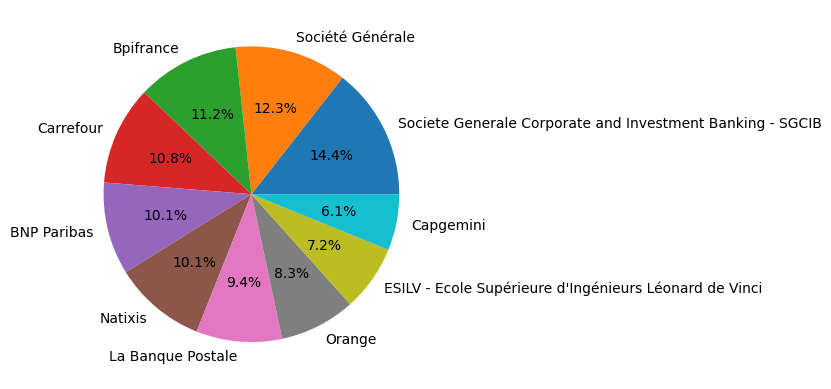

In [101]:
max_company = 10
x = df_connection.groupby(by=['Company']).count().sort_values(by='First Name',ascending=False)['Position'][:max_company]
y = x.index
plt.pie(x,labels=y,autopct='%1.1f%%')
plt.show()


In [102]:
df_connection['Position'] = df_connection['Position'].fillna('')
df_connection['Connected On'] = df_connection['Connected On'].fillna('01 Dec 2015')




In [103]:
list(df_connection.sort_values(['Company'])['Company'].dropna().unique())

[' -',
 ' --',
 '01 Innovation.com',
 '3V Finance ',
 '42c',
 'A&P Zürich GmbH',
 'ABC arbitrage',
 'ABN AMRO',
 'ABRI PLUS',
 'ACCEVOLL',
 'ACE EMPLOI',
 'ACENSI',
 'ADINTIME',
 'ADLPartner',
 'ADN Realty',
 'ADP',
 'ADSF - Agir pour la Santé des Femmes',
 'ADSUM-IT',
 'AFD Tech',
 'AFILIZA',
 'AFNOR Certification',
 'AFP',
 'AFTRAL',
 'AG2R LA MONDIALE',
 'AGENCE 14 SEPTEMBRE',
 'AGRILANDADSL',
 'AI&DATA',
 'AKABI',
 'ALB Conseil',
 'ALD Automotive',
 'ALEC MVE',
 'ALFATRON Electronic Industries',
 'ALL DARK POOL',
 'ALLEA',
 'ALTEN',
 'AMD Consulting',
 'AMG Experiences GmbH',
 'ANAYA',
 'ANCV',
 'ANSC - Agence du Numérique de la Sécurité civile',
 'APICAP',
 "APIEC Assoc. pour la promotion de l'IEC SCIP (Strategic and Competitive Intelligence Professionals) ",
 'APIXIT',
 'APL expert en data centers',
 'APLINES',
 'AQUANTIS  l Cabinet de recrutement ',
 'ARMONY SYSTEM',
 'ARTABAN',
 'ARealTI',
 'ASIP Santé',
 'ASOS.com',
 'ASSA ABLOY Opening Solutions',
 'ATEXO',
 'AUTODISTRIBUTION

In [104]:
company = ''
mot = 'Head'
print(len(company))
if len(company) >=1:
    print(df_connection.loc[(df_connection['Position'].str.contains(mot)) &(df_connection['Company'] == company)].head())
else:
    print(df_connection.loc[(df_connection['Position'].str.contains(mot))].head())


0
   First Name  Last Name                 Company  \
0      Claire   Lefresne      Le Groupe La Poste   
14     Monhir  El-Achheb               Danone SN   
51  Charlotte  REGNEAULT              Fnac Darty   
72    Gabriel     Giely                  Dataddo   
79      Bruno    Valette  Christian Dior Couture   

                                    Position Connected On  
0            Head of Data Lab and Innovation  15 Dec 2021  
14              Global Head of Data Strategy  09 Dec 2021  
51  Head of Datascience & Business Analytics  30 Nov 2021  
72                             Head Of Sales  09 Nov 2021  
79          Global Head of Data Intelligence  08 Nov 2021  


In [105]:
#min_value=datetime.date(2017, 10, 17)
#min_value == pd.to_datetime(df_connection['Date'].tail(1).values[0])

In [106]:
df_connection['Connected On'] = df_connection['Connected On'].astype('str')

In [107]:
df_connection['Date'] = pd.to_datetime(df_connection['Connected On'].apply(lambda x: dt.datetime.strptime(x, '%d %b %Y')))


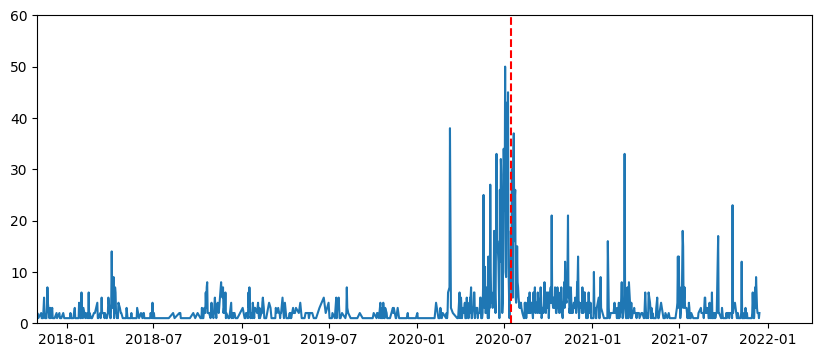

In [108]:
plt.figure(figsize = (10,4))
plt.plot(df_connection.groupby(['Date']).count()['Position'])
plt.xlim(dt.datetime.strptime('01 Nov 2017', '%d %b %Y'))
plt.ylim(0,60)
plt.axvline(x=dt.datetime.strptime('15 Jul 2020', '%d %b %Y'),color='r',ls='--')
plt.show()

In [109]:
d = gender.Detector()
df_connection['Genre'] = df_connection['First Name'].apply(lambda x: d.get_gender(x))


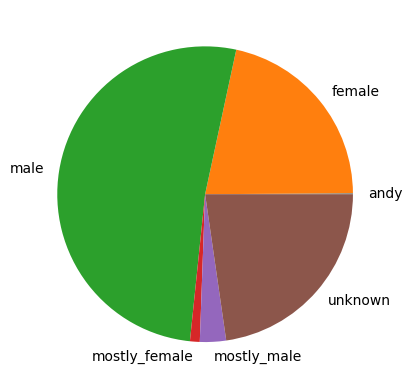

In [110]:
x = df_connection.groupby(['Genre']).count()['Company']
plt.pie(x,labels=x.index,)
plt.show()

In [111]:
df_connection['Company'] = df_connection['Company'].replace('Societe Generale Corporate and Investment Banking - SGCIB','SGCIB')
df_connection['Company'] = df_connection['Company'].replace("ESILV - Ecole Supérieure d'Ingénieurs Léonard de Vinci",'ESILV')



In [112]:
df_connection['Name'] = df_connection['First Name'] + ' ' + df_connection['Last Name']

In [113]:
df_connection.head()

,First Name,Last Name,Company,Position,Connected On,Date,Genre,Name
0,Claire,Lefresne,Le Groupe La Poste,Head of Data Lab and Innovation,15 Dec 2021,2021-12-15,female,Claire Lefresne
1,Anis,Amrane,CANAL+ Group,Concept artist,15 Dec 2021,2021-12-15,male,Anis Amrane
2,Ghassen,Ben Hmidene,Société Générale,Data Science Manager,14 Dec 2021,2021-12-14,unknown,Ghassen Ben Hmidene
3,Yuliet,Perea Diaz 💡,EFREI Paris,Chargée de mission carrière,13 Dec 2021,2021-12-13,unknown,Yuliet Perea Diaz 💡
4,Lisa,KINTRUP,Slide Session,Vice-présidente,13 Dec 2021,2021-12-13,female,Lisa KINTRUP


# Page 2

In [146]:
df_tot = pd.merge(df_message,df_connection, left_on='FROM',right_on='Name',how='outer')
df_message2 = df_tot.drop(columns=['CONVERSATION ID','SENDER PROFILE URL','CONVERSATION TITLE','SUBJECT','FOLDER','First Name','DATE','CONTENT','Last Name','Connected On','Date','Name'])


In [115]:
A = df_message.groupby(['FROM']).count().shape[0]
B = df_connection.shape[0]
D = round(100*A/B,2)
print('Nombre de personne de mon réseau qui m\'ont envoyé un message : '+str(A))
print('J\'ai ' + str(B) + ' personnes dans mon réseau')
print('Ce qui fait : '+str(D)+'%')

print('---')
C = df_message.groupby(['TO']).count().shape[0]
E = round(100*C/B,2)
print('Nombre de personne de mon réseau à qui j\'ai envoyé un message : '+str(C))
print('J\'ai ' + str(B) + ' personnes dans mon réseau')
print('Ce qui fait : '+str(E)+'%')

print('---')
print('Ce qui donne un taux de réponse approximatif de : ' + str(round(100*D/E,2))+'%')

Nombre de personne de mon réseau qui m'ont envoyé un message : 612
J'ai 3410 personnes dans mon réseau
Ce qui fait : 17.95%
---
Nombre de personne de mon réseau à qui j'ai envoyé un message : 942
J'ai 3410 personnes dans mon réseau
Ce qui fait : 27.62%
---
Ce qui donne un taux de réponse approximatif de : 64.99%


In [116]:
df_message.groupby(['FROM']).count().sort_values('TO',ascending=False)

,CONVERSATION ID,CONVERSATION TITLE,SENDER PROFILE URL,TO,DATE,SUBJECT,CONTENT,FOLDER
FROM,,,,,,,,
Benjamin Guigon,1663,3,1663,1661,1663,20,1649,1663
Inès Bouinière,39,0,39,39,39,0,29,39
arnaud guigon,35,0,35,35,35,0,35,35
Mathias PFEIFFER,17,0,17,17,17,0,16,17
LinkedIn Member,15,4,0,15,15,1,15,15
...,...,...,...,...,...,...,...,...
Lucie Perol,1,0,1,1,1,0,1,1
Clotilde GENIÈSSE,1,0,1,1,1,0,1,1
Lucas Dubas,1,0,1,1,1,0,1,1


In [117]:
#mot = st.text_area("Search the people you'r looking for", "?",
#                            help='Name like "Antoine Serreau" or "Serreau" or "Antoine"')
        
list_nom = list(df_connection.sort_values(['Name'])['Name'].unique())
nom = st.selectbox("Name: ",list_nom) 


df_1 = df_connection.loc[df_connection['Name'].str.contains(nom)]
st.table(df_1[['Name','Company','Position','Connected On']].head(20))

NameError: name 'st' is not defined

In [145]:
list(df_connection.sort_values(['Name'])['Name'].unique())

['A-Alexandra B.',
 'ABDALLAH BEN MEIMOUN',
 'ABDOULBARI BENHIMA ✔',
 'ANDJAR Jihane',
 'ARTUS BEAUVAIS',
 'AUDE MARCHAND-VELANDIA',
 'Aaron Djoko',
 'Abdek Mahamoud',
 'Abdelaziz Medkouri',
 'Abdelbasset HAMIDI',
 'Abdelhak Chatty',
 'Abdelhak Djouahra',
 'Abdelhak Doulfakar',
 'Abdelhakim Bekkouche',
 'Abdelhalim Mesbah',
 'Abdeljalil Jliouat',
 'Abdelkabir Anwar',
 'Abdelkader BENGHAFFOR',
 'Abdelkader Dhouibi',
 'Abdellah Lidghi',
 'Abdellahi MOHAMEDEN',
 'Abdellatif KARIMI',
 'Abdelmounaim Derraz',
 'Abdennadher Omayma',
 'Abderahmen El Arbi',
 'Abderrahman CHAKOUCH',
 'Abderrahman GASMI',
 'Abderrahmane BADRY',
 'Abderrahmane Filali',
 'Abderrahmen Dhif',
 'Abderrahmen Yecine Oueslati',
 'Abderrezak KHABAT',
 'Abdessamii Lazghab',
 'Abdou FALL',
 'Abdoul Mouize ZAKARIA',
 'Abdoulaye CAMARA',
 'Abhinaba Banerjee',
 'Abla NABIL',
 'Abou NDIONGUE',
 'Aboubacar BARRY',
 'Abraham Arik',
 'Abrar Fayaz Khan 法亚兹',
 'Achille Prouteau-Mandine',
 'Achraf Ben Afia',
 'Achraf Hakim',
 'Achraf

In [118]:
df_connection.dropna(inplace=True)

In [ ]:
st.write('WAIT, there is an issue... How is it possible that there is '+str(num) +
         ' people that did not answer you whereas you said that you received messages from '+str(A) + ' different people and you send '+str(C)+ ' messages to different people.???')
st.write('Actually the answer is quit simple, it\'s because of some message that came from group in Linkedin that distort the calcul and obviously there is some outlayer that are quit hard to separe from the rest...')



In [119]:
df_connection.loc[df_connection['Name'] == 'Anis Amrane']

,First Name,Last Name,Company,Position,Connected On,Date,Genre,Name
1,Anis,Amrane,CANAL+ Group,Concept artist,15 Dec 2021,2021-12-15,male,Anis Amrane


In [143]:
#df_connection.loc[df_connection['Genre'] == 'male'].iloc[:50]
df_connection.loc[df_connection['Name'].str.contains('Marko')]

,First Name,Last Name,Company,Position,Connected On,Date,Genre,Name
42,Marko,Arsic,BNP Paribas,Data Scientist / Analyst en Cybersécurité,02 Dec 2021,2021-12-02,male,Marko Arsic


# DataFrame Message

In [157]:
stop_words = set(stopwords.words('english'))

send_message = df_message.loc[(df_message['FROM'] == 'Benjamin Guigon')]
receive_message = df_message.loc[(df_message['TO'] == 'Benjamin Guigon')& (df_message['FROM'] != 'LinkedIn Premium')]


In [158]:
receive_message_clean = function_nettoyage(receive_message,'CONTENT')#['CONTENT']
send_message_clean = function_nettoyage(send_message,'CONTENT')#['CONTENT']

In [177]:
counter_r = counter_word(receive_message_clean['CONTENT'])
counter_e = counter_word(send_message_clean['CONTENT'])


print("Message reçus : %s mots." % len(counter_r))
print("Message envoyés : %s mots." % len(counter_e))

Message reçus : 6122 mots.
Message envoyés : 3511 mots.


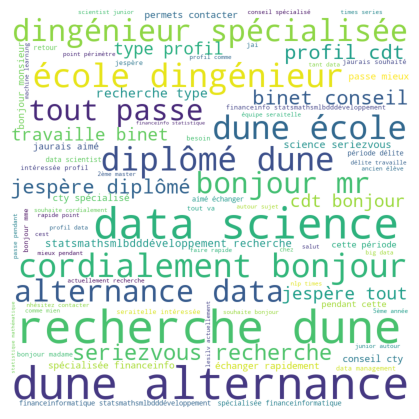

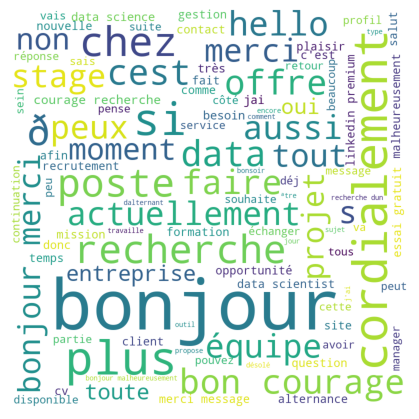

In [170]:
plot_wordcloud(send_message_clean['CONTENT'],100)
plot_wordcloud(receive_message_clean['CONTENT'],100)

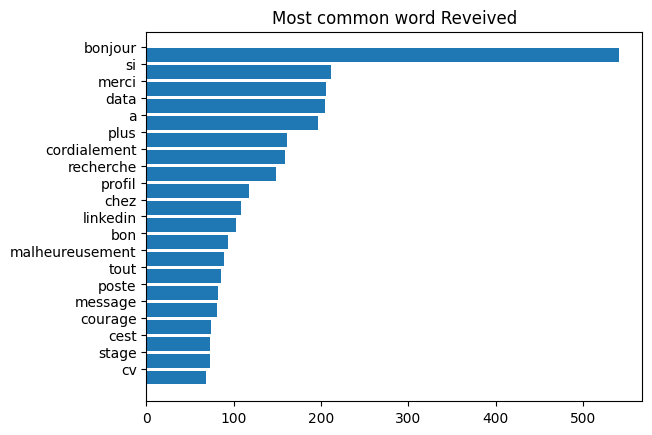

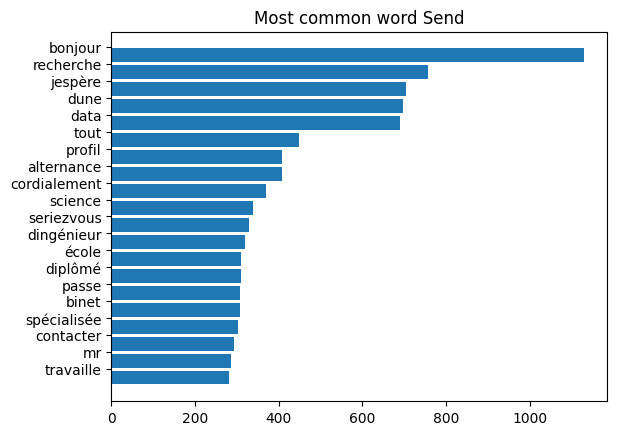

In [176]:
#wordBarGraphFunction2(df,column,title)
wordBarGraphFunction(receive_message_clean,'CONTENT','Most common word Reveived',20)
wordBarGraphFunction(send_message_clean,'CONTENT','Most common word Send',20)

# Fonctions

In [129]:
stop = set(stopwords.words("french"))
hashtags = re.compile(r"^#\S+|\s#\S+")
mentions = re.compile(r"^@\S+|\s@\S+")
urls = re.compile(r"https?://\S+")

def process_text(text):
    text = re.sub(r'http\S+', '', text)
    text = hashtags.sub(' hashtag', text)
    text = mentions.sub(' entity', text)
    return text.strip().lower()

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)


def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)




def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

# def remove_stopwords2(text):

#     word_tokens = word_tokenize(text)
#     filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

#     return filtered_sentence

def net(words):
    
    
    words = words.replace('Ã©', 'é')
    words = words.replace('ã§', 'ç')
    words = words.replace('ã¨', 'è')
    words = words.replace('â\x80\x99', "\'")
    words = words.replace('ã©', 'é')
    words = words.replace('ã', 'à')
    words = words.replace('ã´', 'ô')
    words = words.replace('â\x80¦', '...')
    words = words.replace('à´', 'ô')

    words = words.replace('benjamin', '')
    #words = words.replace('Bonjour', '')
    
    words = words.replace('guigon', '')
    words = words.replace("j'espère", '')
    words = words.replace("allez", '')
    words = words.replace("bien", '')
    words = words.replace("bonne", '')
    words = words.replace("journée", '')
    words = words.replace("remercie", '')
    words = words.replace("spinmail", '')
    
    words = words.replace("x80", '')
    words = words.replace("à", '')
    words = words.replace(",", '')
    words = words.replace("?", '')
    words = words.replace("!", '')
    words = words.replace(":", '')
    
    words = words.replace("â", '')
    words = words.replace("ca", '')
    words = words.replace("ça", '')
    
    return words

In [120]:
# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [166]:
# Function to plot wordcloud
def plot_wordcloud(data,max_words):
    words = '' 
    stopwords = set(STOPWORDS) 
    for val in data.values: 
        val = str(val) 
        tokens = val.split() 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10,
                    max_words=max_words).generate(words) 
    
    plt.figure(figsize = (4,6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

In [174]:
def wordBarGraphFunction(df,column,title,num_word):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("french")]
    plt.barh(range(num_word), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:num_word])])
    plt.yticks([x + 0.5 for x in range(num_word)], reversed(popular_words_nonstop[0:num_word]))
    plt.title(title)
    plt.show()

def wordBarGraphFunction2(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("french")]
    return popular_words_nonstop

In [143]:
def function_nettoyage(df,col):

    df = df.copy()
    df[col] = df[col].astype('str')
    df[col] = df[col].apply(process_text)
    df[col] = df[col].apply(remove_URL)
    df[col] = df[col].apply(remove_html)
    df[col] = df[col].apply(remove_emoji)
    df[col] = df[col].apply(remove_punct)
    df[col] = df[col].apply(remove_stopwords)
    df[col] = df[col].apply(net)
    
    return df

In [ ]:
# def wordCloudFunction(df,column,numWords):
#     topic_words = [ z.lower() for y in
#                        [ x.split() for x in df[column] if isinstance(x, str)]
#                        for z in y]
#     word_count_dict = dict(Counter(topic_words))
#     popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
#     popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("french")]
    
#     word_string=str(popular_words_nonstop)
#     wordcloud = WordCloud(stopwords=STOPWORDS,
#                           background_color='white',
#                           max_words=numWords,
#                           width=1000,height=1000,
#                          ).generate(word_string)
#     plt.clf()
#     plt.imshow(wordcloud)
#     plt.axis('off')
#     plt.show()

# def wordBarGraphFunction(df,column,title):
#     topic_words = [ z.lower() for y in
#                        [ x.split() for x in df[column] if isinstance(x, str)]
#                        for z in y]
#     word_count_dict = dict(Counter(topic_words))
#     popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
#     popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("french")]
#     plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
#     plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
#     plt.title(title)
#     plt.show()